# Dataset :

Telecom churn prediction dataset:

- Description: Contains customar information for a subcription-based service provider to predict cutomer churn 
(leaving the services). 
- Colomns: includes customer deatail, service used, contract terms and churn status.
- Purpose: Used for customer churn analysis, segmentation, and retention strategies.
- Application: Churn prediction, customer satisfaction analysis, and targeted marketing.
- Analysis tasks: EDA,data preprocessing, ML model building, evaluation and model deployment.
- Relevance: A practical dataset for real world data science and customer relationship management scenarios.
 

# Step 1 : import libraries 

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick 
import warnings 
warnings.filterwarnings("ignore")


# Step 2 : Loading the dataset 


In [3]:
telecom_cust = pd.read_csv("Telco_Customer_Churn.csv")

# Step 3 : Data preprocessing & EDA 

In [4]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
# Converting total charges to numerical data types 
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')

In [9]:
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# removing missing values 

telecom_cust.dropna(inplace=True)


In [11]:
# Remove customer id from the data set 

df2= telecom_cust.iloc[:,1:]

In [12]:
# Converting the predictor variable in a bianary numeric variable 

df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)

df2['Churn'].replace(to_replace='No', value=0, inplace=True)

In [13]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [14]:
# Let's convert all cetegorical variables into dummy variables 

df_dumm = pd.get_dummies(df2)
df_dumm.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


<Axes: >

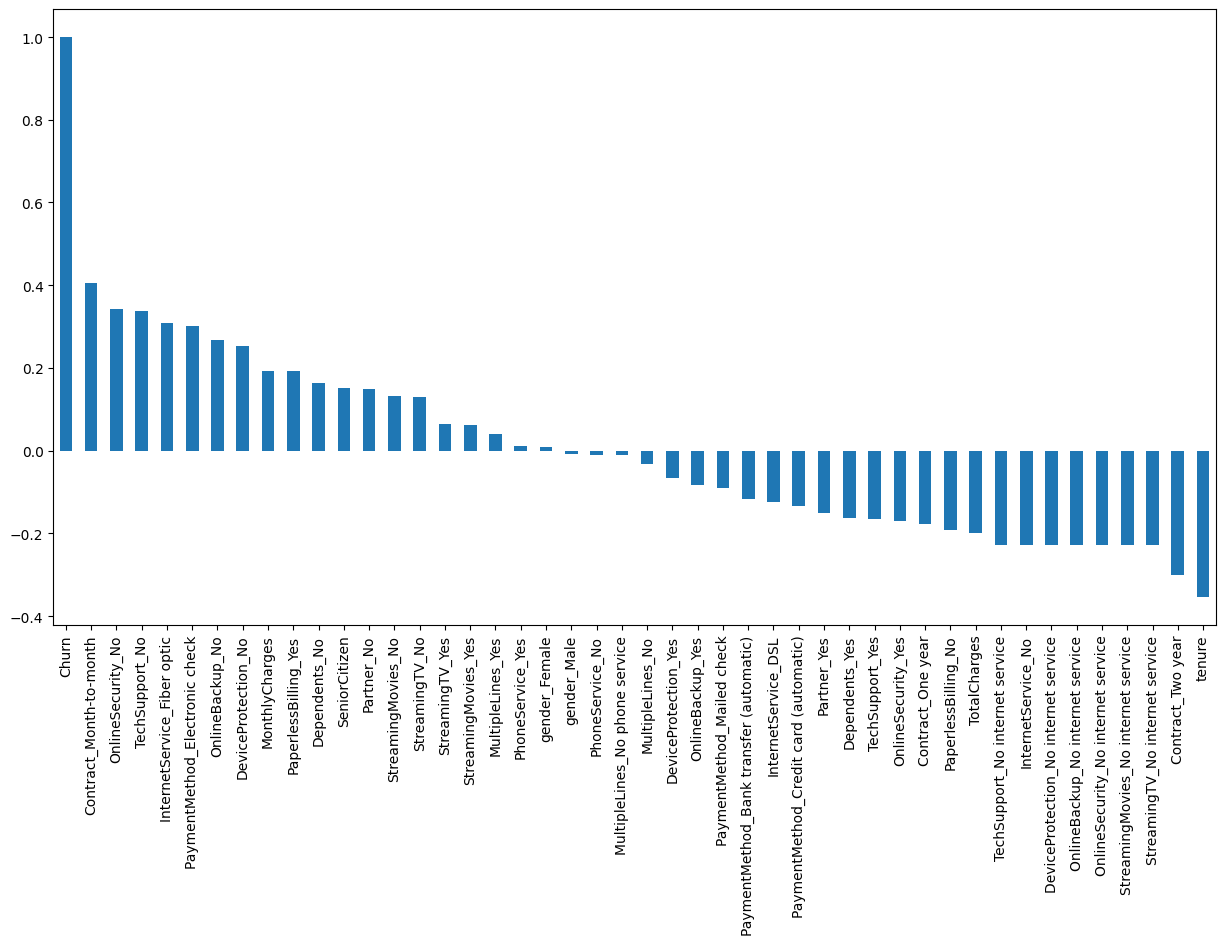

In [15]:
# get correletion of "churn" with the other variables 

plt.figure(figsize=(15,8))
df_dumm.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

# Interpretation 

month to month contract absence of online security and tech support seem to be positively correlated with churn.
while tenure ,two year contract seems to be negetively correlated with churn. 

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet 
connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying
the important variables.



## Data Exploration 

- To understand patterns & potentially from some hypothesis 

### A) Demographic

- Gender, Age Range, Partner and Dependent status

------------------------------------------------------

1) Gender Distribution

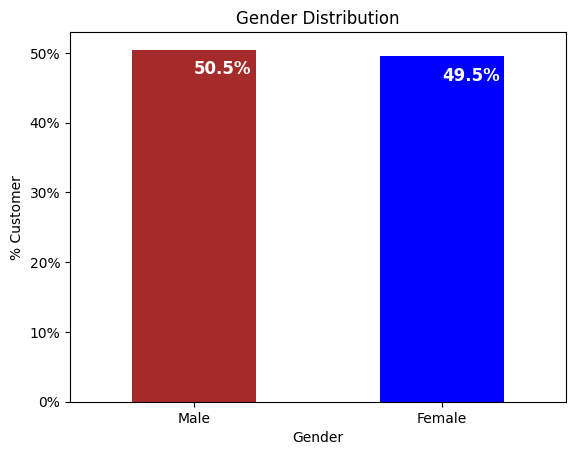

In [16]:
colors = ['brown','blue']
gender_counts = telecom_cust['gender'].value_counts()
ax = (gender_counts * 100 / len(telecom_cust)).plot(kind='bar', stacked=True, rot=0, color=colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customer')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

# Itrate over the bar heights and add labels to the bar 
total= gender_counts.sum()
for bar ,count in zip (ax.patches,gender_counts):
    percentage = count / total * 100 
    ax.text(bar.get_x() + bar.get_width() / 2 , bar.get_height()- 3.5, f'{percentage:.1f}%',
             fontsize= 12, color='white', weight = 'bold')


plt.show()

# ----->
- Almost half are male & other half are female

#
2) Senior Citizen (%)

Text(0.5, 1.0, '% of Senior Citizens')

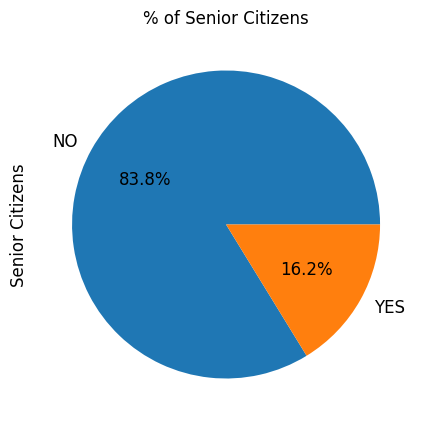

In [17]:
ax = (telecom_cust['SeniorCitizen'].value_counts() * 100 / len(telecom_cust))\
.plot.pie(autopct ='%.1f%%', labels = ['NO', 'YES'], figsize= (5,5), fontsize = 12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize=12)
ax.set_title('% of Senior Citizens',fontsize=12)

# ------>

- Only 16% are senior citizen, that means most of the customer are younger people

# 
3) Partner and dependent status

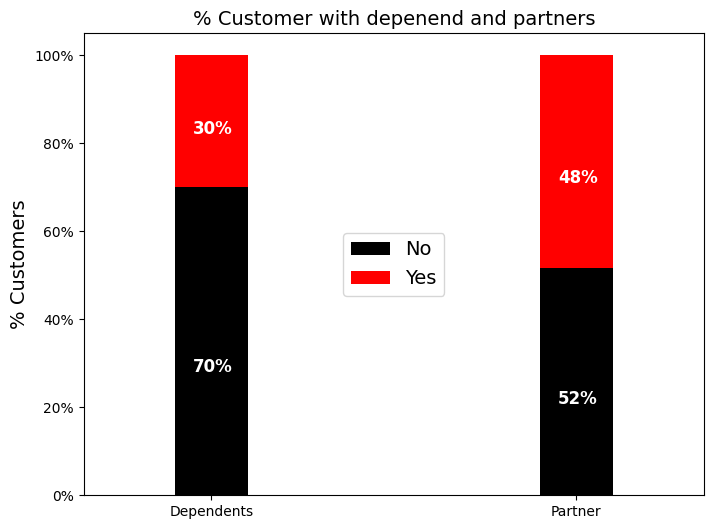

In [18]:
df2= pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3 * 100 / len(telecom_cust)
colors=['black','red']

ax = df3.loc[:,'customerID'].plot.bar(stacked= True, color= colors, figsize=(8,6),rot=0,width=0.2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customer with depenend and partners', size= 14 )
ax.legend(loc = 'center', prop = {'size': 14 })

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height),(p.get_x()+.25*width,p.get_y() + .4 * height),
                color = 'white',
                weight = 'bold',
                size = 12) 

# ----->

about 50% of the customer have a partner, while only 30% of the total customer have dependents.

### B) Customer Account Information

- Tenure & contract

------------------------------------------

1) Tenure

Text(0.5, 1.0, 'No of Customers by their tenure')

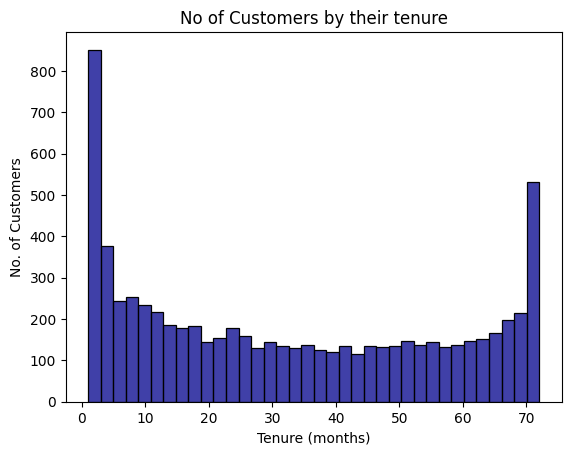

In [19]:
ax = sns.histplot(telecom_cust['tenure'], bins=int(180/5), color='darkblue', edgecolor='black')
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('No of Customers by their tenure')


#
2) Contracts


Text(0.5, 0, 'No of Customers by contract type')

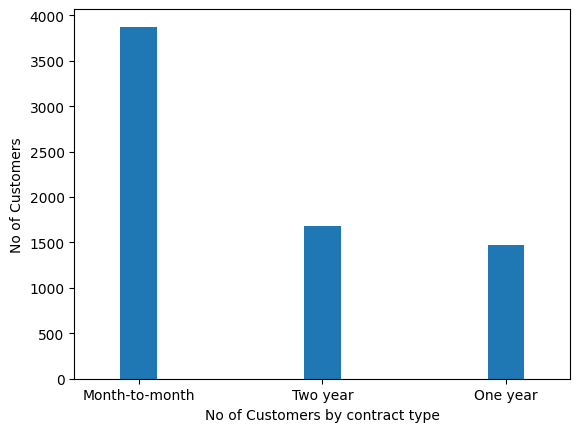

In [20]:
ax = telecom_cust['Contract'].value_counts().plot(kind='bar',rot=0,width = 0.2)
ax.set_ylabel('No of Customers')
ax.set_xlabel('No of Customers by contract type')

# ----->

most of the customer are in month to month contract while they are equal number of customer in two year and one year contract.


Text(0.5, 1.0, 'Two year contract')

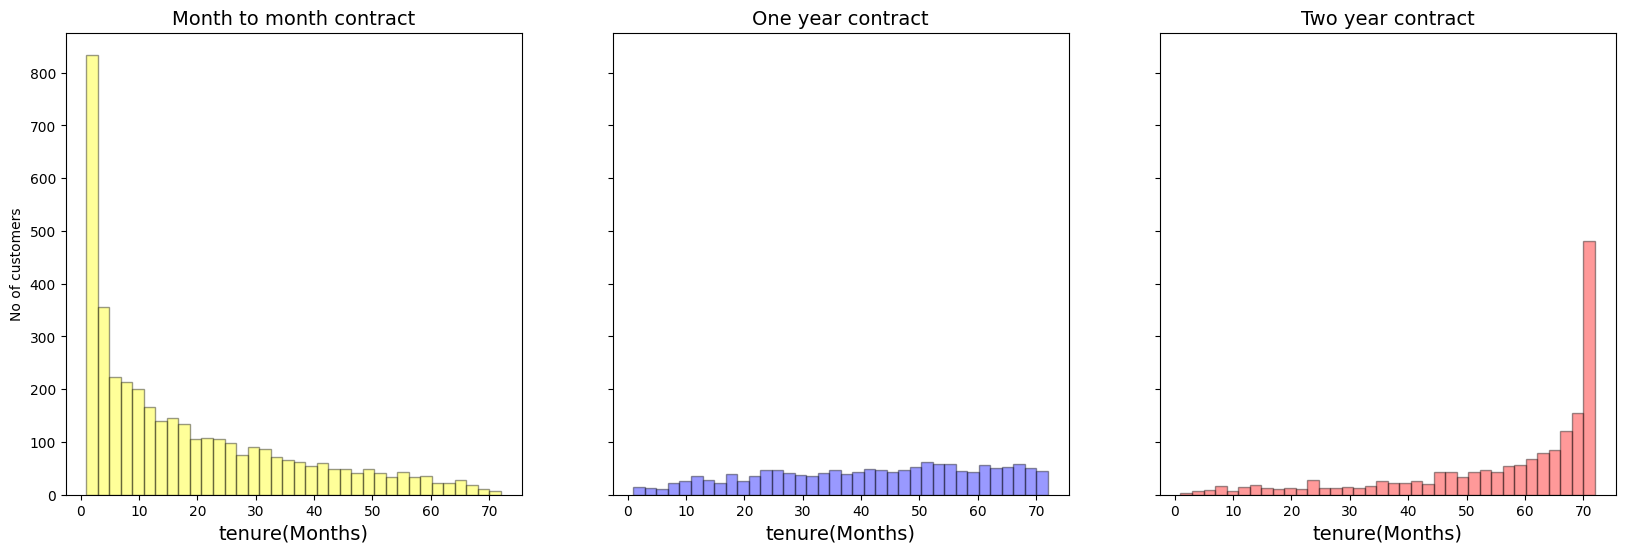

In [21]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=1, ncols=3, sharey= True, figsize=(20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                 hist = True, kde = False,
                 bins = int(180/5),color= 'yellow',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4},
                ax=ax1)
ax.set_ylabel('No of customers')
ax.set_xlabel('tenure(Months)',size = 14)
ax.set_title('Month to month contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                 hist = True, kde = False,
                 bins = int(180/5),color= 'blue',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4},
                ax=ax2)

ax.set_xlabel('tenure(Months)',size = 14)
ax.set_title('One year contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                 hist = True, kde = False,
                 bins = int(180/5),color= 'red',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4},
                ax=ax3)

ax.set_xlabel('tenure(Months)',size = 14)
ax.set_title('Two year contract',size = 14)

# ----->

Interestingly most of the customer used 1-2 months monthly contracts, while 2 years contracts tend to last for 70 months. this shows that the customer taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

### C) Services Used by Customers



In [22]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

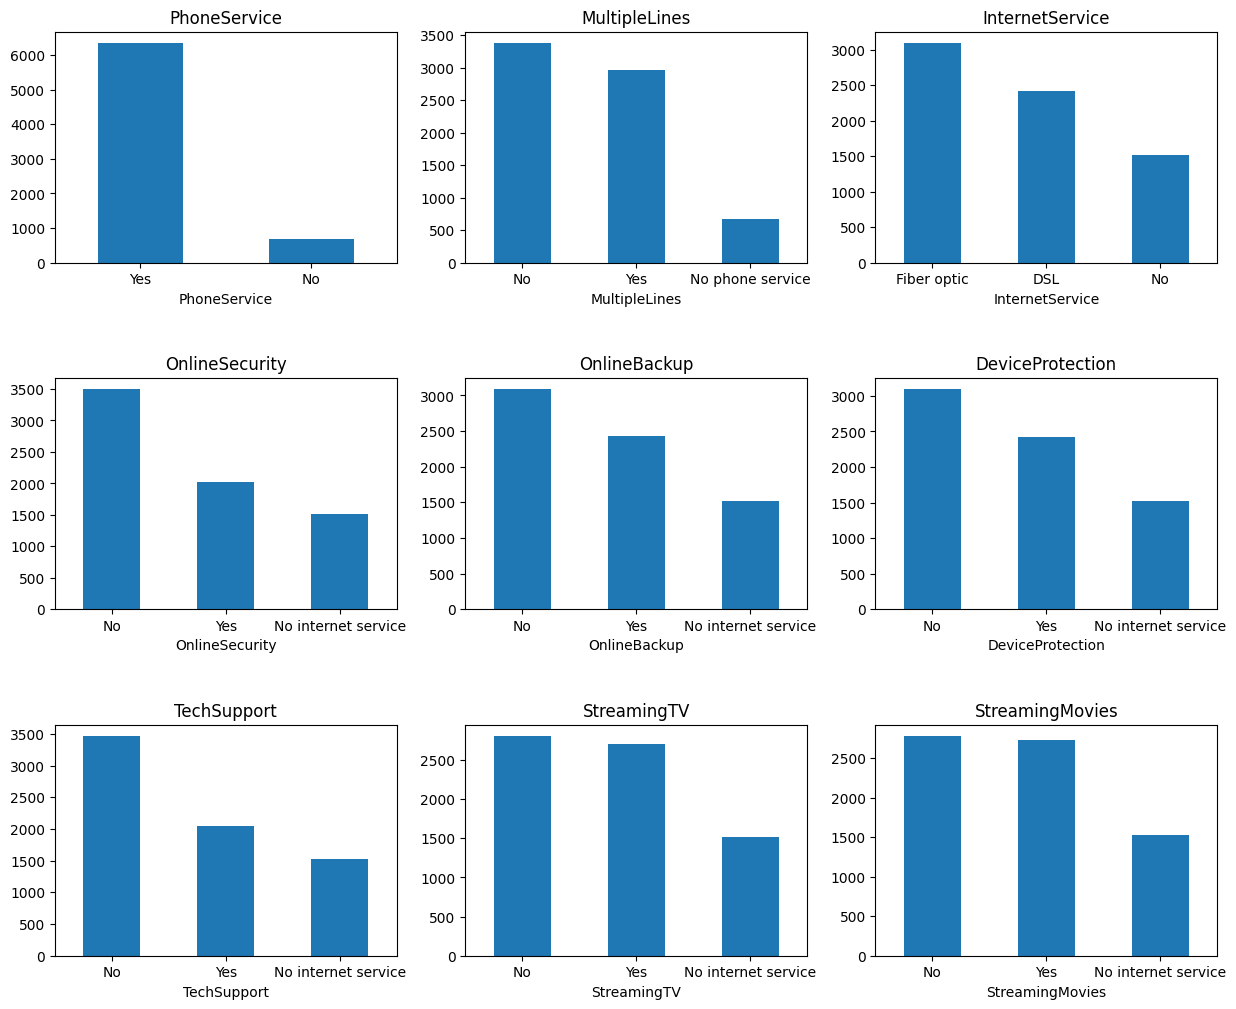

In [23]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15,12))
plt.subplots_adjust(hspace=0.5)

for i, item in enumerate(services):
    row, col = divmod (i,3)

    ax = telecom_cust[item].value_counts().plot(kind= 'bar', ax=axes[row , col], rot = 0 )
    ax.set_title(item)

    for tick in ax.get_xticklabels():
        tick.set_rotation(0)

plt.show()        

### D) Relation Between Monthly & Total Charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

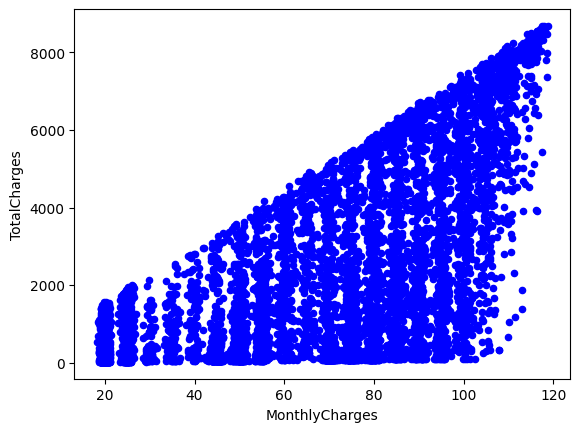

In [24]:
telecom_cust[['MonthlyCharges','TotalCharges']].plot.scatter(x ='MonthlyCharges',
                                                             y ='TotalCharges',color = 'blue')

# ----->

Total charge increases as the monthly bil for the customer increases.

### E) Relationship between idependent variable (Churn) & other important variables

-------------------------------------------------------------------------------------------------

1) Churn rate with Customer

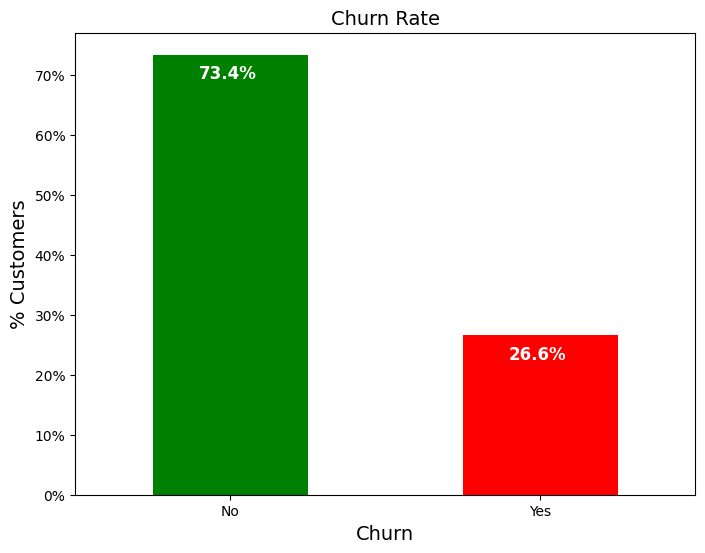

In [25]:
colors = ['green','red']

ax = (telecom_cust['Churn'].value_counts() * 100 / len(telecom_cust)).plot(kind='bar',
                                                                         stacked = True,
                                                                         rot = 0,
                                                                         color = colors,
                                                                         figsize = (8,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x() + 0.15, i.get_height() - 4.0,
            str(round((i.get_height() / total), 1)) + '%',
            fontsize=12,
            color='white',
            weight='bold')    

# 

2. Churn rate by ------> tenure, seniority, contract type, monthly charges and total charges
-
2.1. Churn vs Tenure

<Axes: xlabel='Churn', ylabel='tenure'>

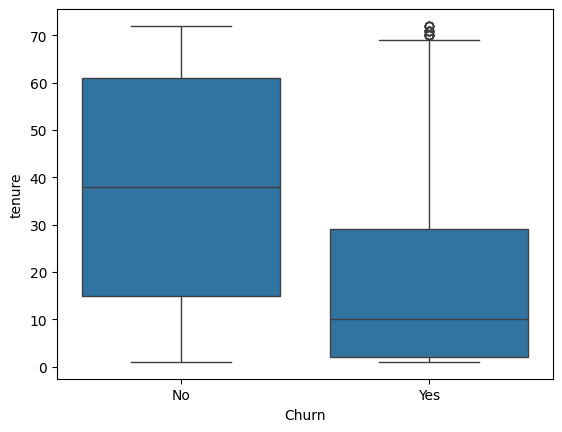

In [26]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

# ----->

The customers who do not churn, they tend to stay for a longer tenure with the telecom company.

# 
- 2.2 Churn by Contract Type

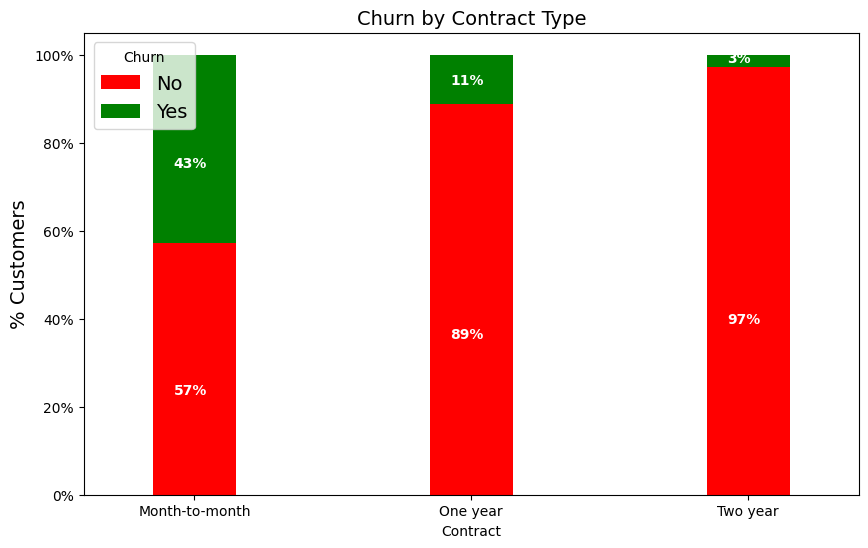

In [35]:
# colors = ['orange','brown']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 10)


# -----> 

The customer who have a month to month contract have very high churn rate.

# 
- 2.3 Churn by Seniority

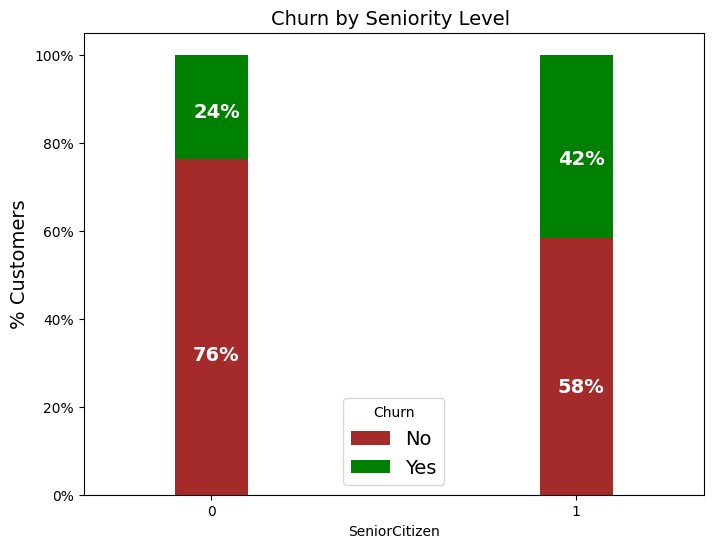

In [41]:
colors = ['brown','green']
contract_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Seniority Level ',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)


# ------>

Senior Citizens have almost double the churn rate than younger population.

# 

- 2.4 Churn by Monthly Charges

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

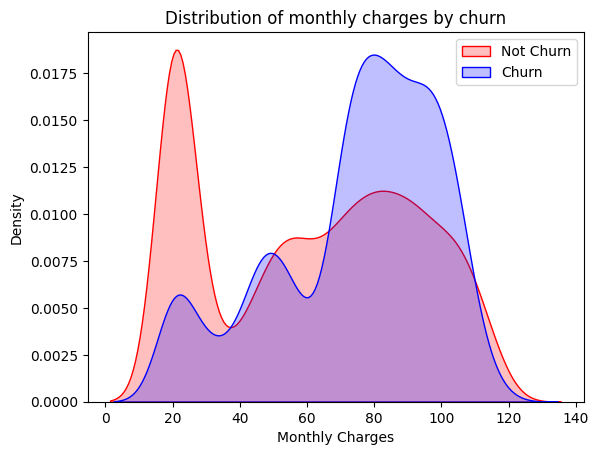

In [49]:
ax=sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == "No")], color='red', shade = True)

ax=sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == "Yes")],ax=ax, 
               color='blue', shade = True)

ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

# ----->

Higher % of customers churn when the monthly charges are high.

# 
- 2.5 Churn by Total Charges

Text(0.5, 1.0, 'Distribution of Total charges by churn')

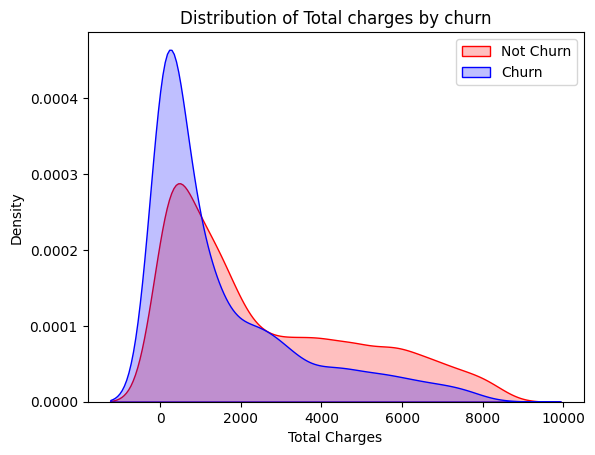

In [51]:
ax=sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == "No")], color='red', shade = True)

ax=sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == "Yes")],ax=ax, 
               color='blue', shade = True)

ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total charges by churn')

# ----->

There is higer churn when the total charges are lower.

## Step 4: Predictive modeling - ML Algorithms

--------------------------------------------------------------------------------------------------------
Developing 
- Logistic Regression, 
- Random Forest, 
- SVM, 
- ADA Boost and 
- XG Boost

and compare them

### 1. Logistic Regresson

In [53]:
# We will use the data frame where we had created dummy variables

X = df_dumm.drop(columns=['Churn'])
y = df_dumm['Churn'].values

from sklearn.preprocessing import MinMaxScaler

feature = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = feature

In [55]:
# Create train & Test data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 13)

In [56]:
# Running Logistic regession model 

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train,y_train)


In [61]:
from sklearn import metrics
prediction_test = model.predict(X_test)

# Print the pridiction accuracy 

print(metrics.accuracy_score(y_test,prediction_test))

0.7995735607675906


Axes(0.125,0.11;0.775x0.77)


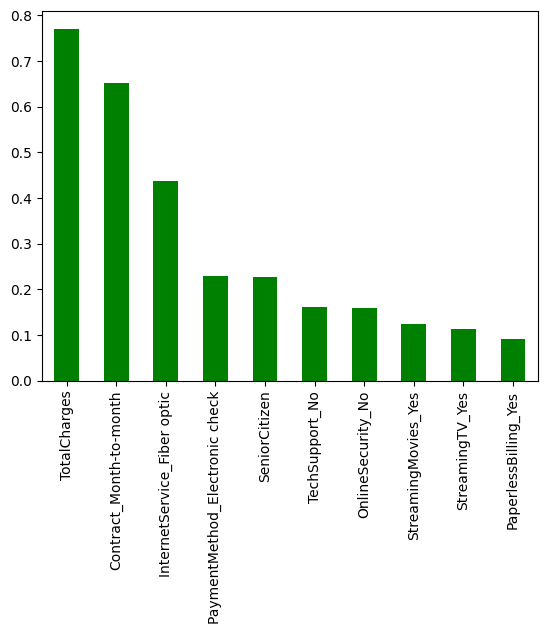

In [62]:
# To get the weights of all the variables


weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar', color = 'green'))

Axes(0.125,0.11;0.775x0.77)


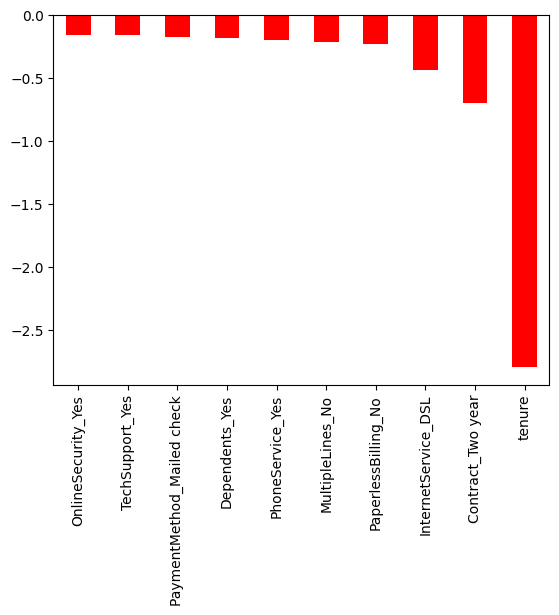

In [63]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar', color = 'red'))


### 2. Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 13)
model_rf = RandomForestClassifier(n_estimators= 1000, oob_score=True, n_jobs=1, random_state=50, max_leaf_nodes=30)
model_rf.fit(X_train,y_train)

# Make prediction

prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test))

0.798862828713575


<Axes: >

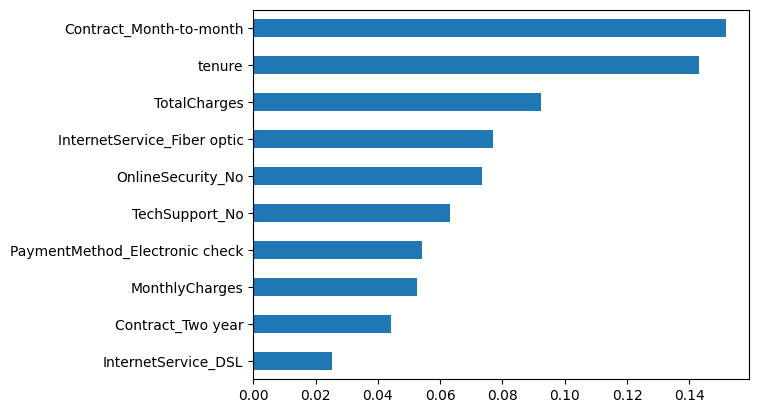

In [66]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

#### Observations - Random Forest

- Monthly contract, tenure and total charges are the most important predictor variables to predict churn.
- The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

### 3. Support Vecor Machine (SVM)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [69]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear')
model.svm.fit(X_train,y_train)
pred = model.svm.predict(X_test)
metrics.accuracy_score(y_test,pred)

0.7938877043354655

In [70]:
# Create Confusion Metrics

from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,pred))

[[936 107]
 [183 181]]


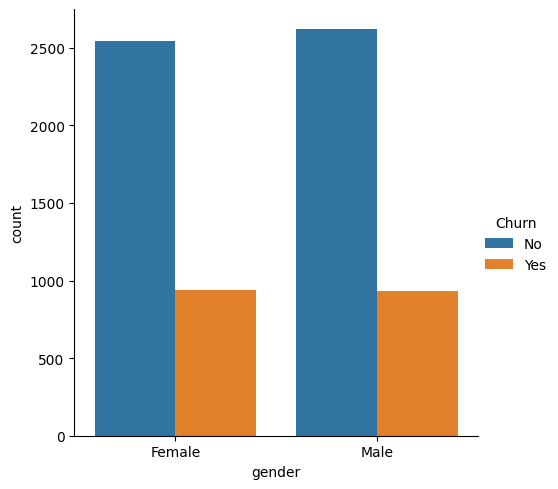

In [71]:
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=telecom_cust,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

### 4. ADA Boost

In [72]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,y_train)
preds =model.predict(X_test)
metrics.accuracy_score(y_test,preds)

0.8073916133617626

### 5. XG Boost

In [75]:
from xgboost import XGBClassifier 
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7981520966595593